In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale

In [28]:
retail = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\Online Retail.csv",sep=',',encoding='ISO-8859-1',header=0)

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [29]:
retail['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [30]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [31]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
retail.shape

(541909, 8)

In [33]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [34]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [35]:
((retail.isnull().sum())/len(retail.index))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [36]:
order_wise = retail.dropna()

In [37]:
((order_wise.isnull().sum())/len(retail.index))*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [38]:
order_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [39]:
amount = pd.DataFrame(order_wise['UnitPrice']*order_wise['Quantity'],columns=['amount'])
order_wise = pd.concat([order_wise, amount],axis=1)
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [48]:
monetary = order_wise.groupby('CustomerID').amount.sum()

In [49]:
monetary = pd.DataFrame(monetary)

In [50]:
monetary.reset_index()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [51]:
frequency = order_wise[['CustomerID', 'InvoiceNo']]

In [52]:
k = frequency.groupby('CustomerID').InvoiceNo.count()

In [53]:
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ['CustomerID', 'Frequency']
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [54]:
master = monetary.merge(k,on='CustomerID',how='inner')

master.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [55]:
recency = order_wise[['CustomerID','InvoiceDate']]

In [56]:
maximum = recency['InvoiceDate'].max()

In [57]:
maximum = maximum + pd.DateOffset(days=1)

In [58]:
recency['diff']  = maximum - recency.InvoiceDate

C:\Users\Roshan Salunke\AppData\Local\Temp\ipykernel_12408\3351756760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency['diff']  = maximum - recency.InvoiceDate


In [59]:
recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [60]:
maximum

Timestamp('2011-12-10 12:50:00')

In [66]:
df = pd.DataFrame(recency.groupby('CustomerID')['diff'].min())

In [67]:
df = df.reset_index()

In [71]:
df.columns = ['CustomerID','Recency']
df.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [82]:
RFM = master.merge(df, on='CustomerID')

In [83]:
RFM.head()

,CustomerID,amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


{'whiskers': [<matplotlib.lines.Line2D at 0x280be561160>,
 'caps': [<matplotlib.lines.Line2D at 0x280be561880>,
 'boxes': [<matplotlib.lines.Line2D at 0x280be4d9d90>],
 'medians': [<matplotlib.lines.Line2D at 0x280be561fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x280be570370>],
 'means': []}

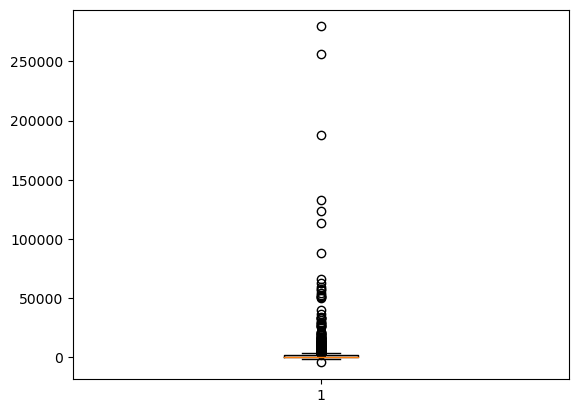

In [80]:
plt.boxplot(rfm.amount)

In [85]:
Q1 = RFM['amount'].quantile(0.25)
Q3 = RFM['amount'].quantile(0.75)
IQR = Q3 - Q1

In [86]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

-1684.1812499999999 3589.2687499999997


In [87]:
RFM = RFM[(RFM['amount']<=upper_limit) & (RFM['amount']>=lower_limit)]

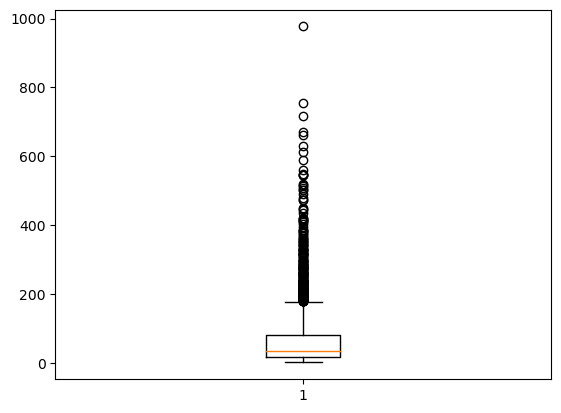

In [89]:
plt.boxplot(RFM.Frequency)
plt.show()

In [90]:
Q1 = RFM['Frequency'].quantile(0.25)
Q3 = RFM['Frequency'].quantile(0.75)
IQR = Q3 - Q1

In [91]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [92]:
RFM = RFM[(RFM['Frequency']>=lower_limit) & (RFM['Frequency']<=upper_limit)]

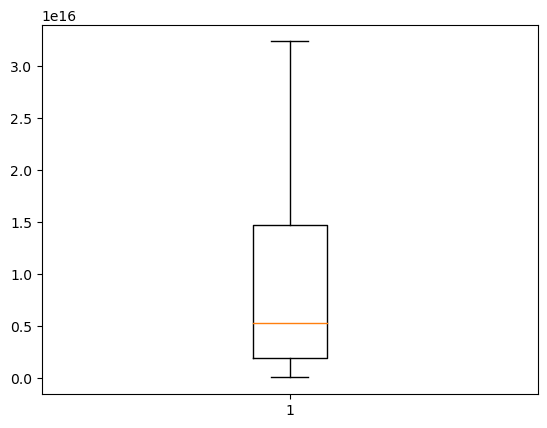

In [93]:
plt.boxplot(RFM.Recency)
plt.show()

In [94]:
Q1 = RFM['Recency'].quantile(0.25)
Q3 = RFM['Recency'].quantile(0.75)
IQR = Q3 - Q1

In [95]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [96]:
RFM = RFM[(RFM['Recency']>=lower_limit) & (RFM['Recency']<=upper_limit)]

In [97]:
RFM_norm1 = RFM.drop('CustomerID', axis=1)

In [98]:
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

In [99]:
RFM_norm1.head()

,amount,Frequency,Recency
0,0.00,2,326
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
5,1545.41,95,36


In [100]:
from sklearn.preprocessing import StandardScaler

standard_scalar = StandardScaler()

RFM_norm1 = standard_scalar.fit_transform(RFM_norm1)

In [101]:
RFM_norm1 = pd.DataFrame(RFM_norm1)

In [102]:
RFM_norm1.columns = ['Frequency', 'Amount', 'Recency']

In [103]:
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


In [104]:
# Function to calculate Hopkins score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [105]:
hopkins(RFM_norm1)

0.8975823090658078

In [106]:
from sklearn.cluster import KMeans

model_clus5 = KMeans(n_clusters=5,max_iter=50,random_state=1)

model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=5, random_state=1)

In [109]:
from sklearn.metrics import silhouette_score

sse = []

for k in range(2,30):
    kmeans = KMeans(n_clusters=k,max_iter=50,random_state=1).fit(RFM_norm1)
    
    sse.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

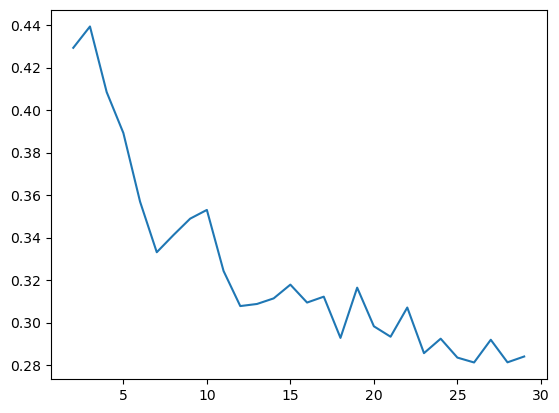

In [110]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);

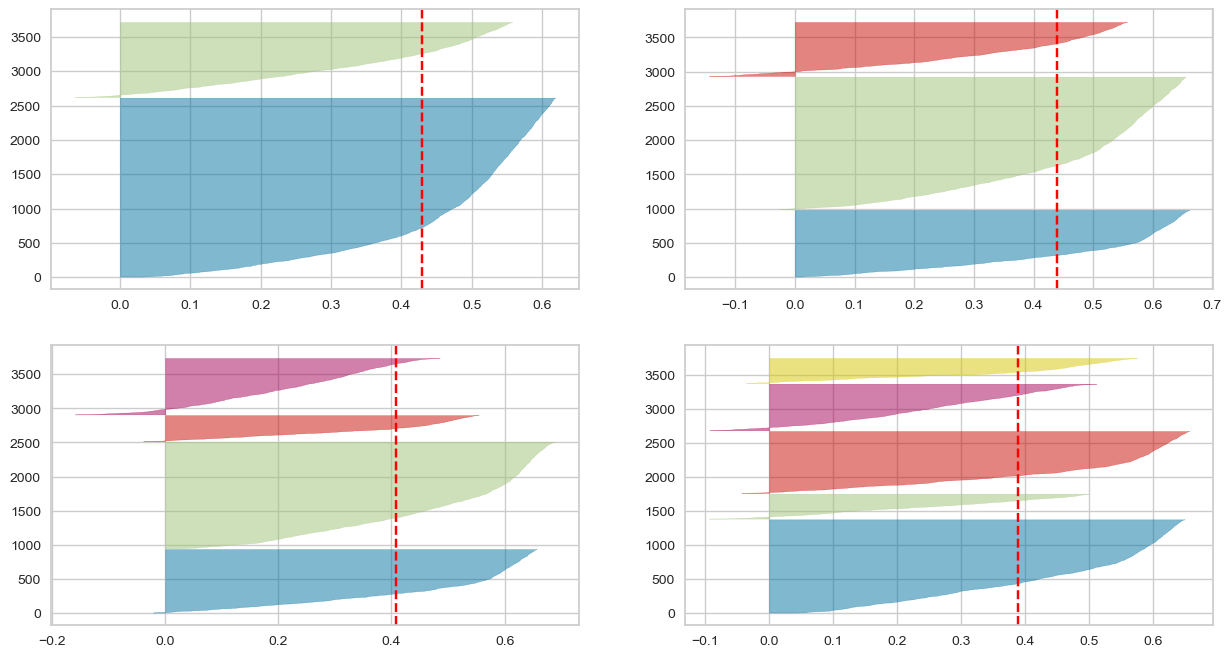

In [113]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2,figsize=(15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=50,random_state=1)
    
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    
    visualizer.fit(RFM_norm1)

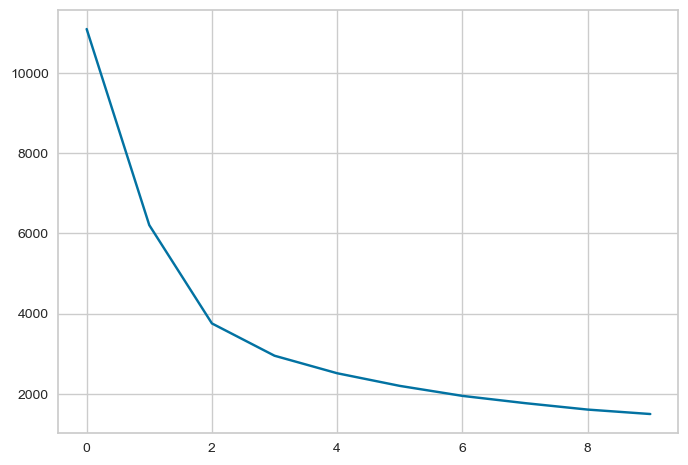

In [114]:
ssd = []

for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters=num_clusters,max_iter=50,random_state=42)
    
    model_clus.fit(RFM_norm1)
    
    ssd.append(model_clus.inertia_)
    
    
plt.plot(ssd)
plt.show()

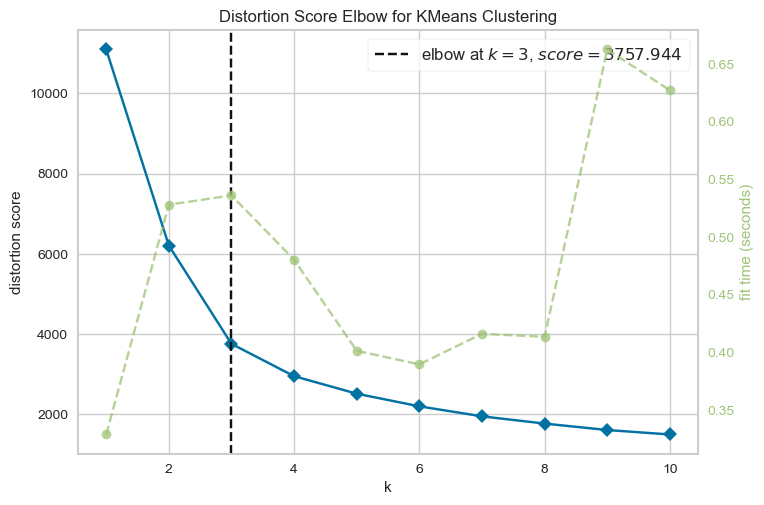

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=50, n_clusters=10, random_state=42),
                 k=(1, 11))

In [115]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=42,max_iter=50),RFM_norm1,k=(1,11))

In [116]:
RFM.index = pd.RangeIndex(len(RFM.index))

m = pd.Series(model_clus5.labels_)

RFM_km = pd.concat([RFM,m],axis=1)

RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days

km_clusters_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())

km_clusters_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())

km_clusters_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [117]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount,km_clusters_frequency,km_clusters_recency],axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,23.325785,357.594530,57.572681
1,1,114.021798,912.557139,53.980926
2,2,20.558856,327.037096,262.393839
3,3,53.668613,1201.448994,50.119708
4,4,117.888283,2471.402482,38.198910


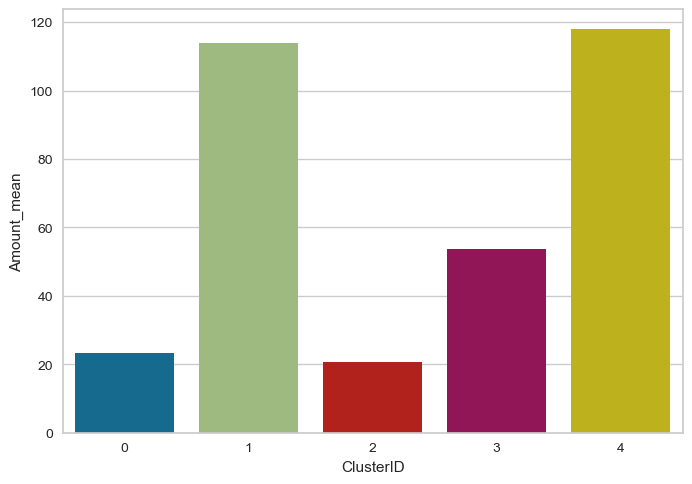

In [118]:
sns.barplot(x=df['ClusterID'],y=df['Amount_mean'])
plt.show()

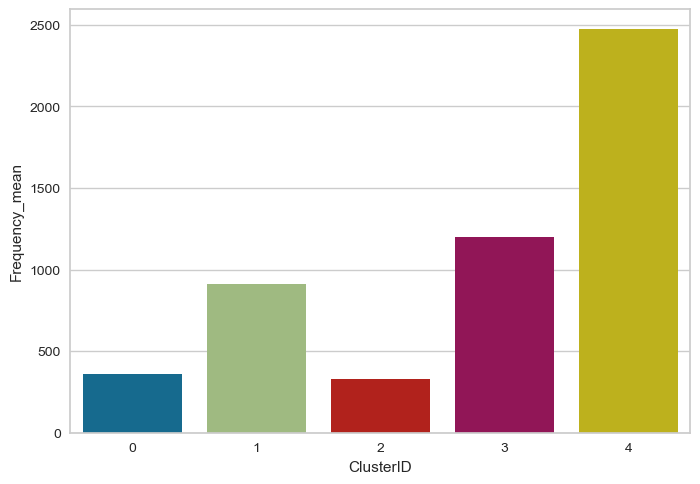

In [119]:
sns.barplot(x=df['ClusterID'],y=df['Frequency_mean'])
plt.show()

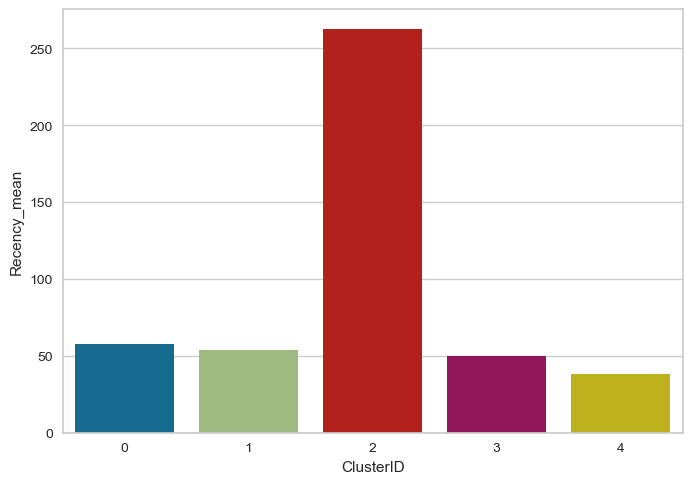

In [120]:
sns.barplot(x=df['ClusterID'],y=df['Recency_mean'])
plt.show()

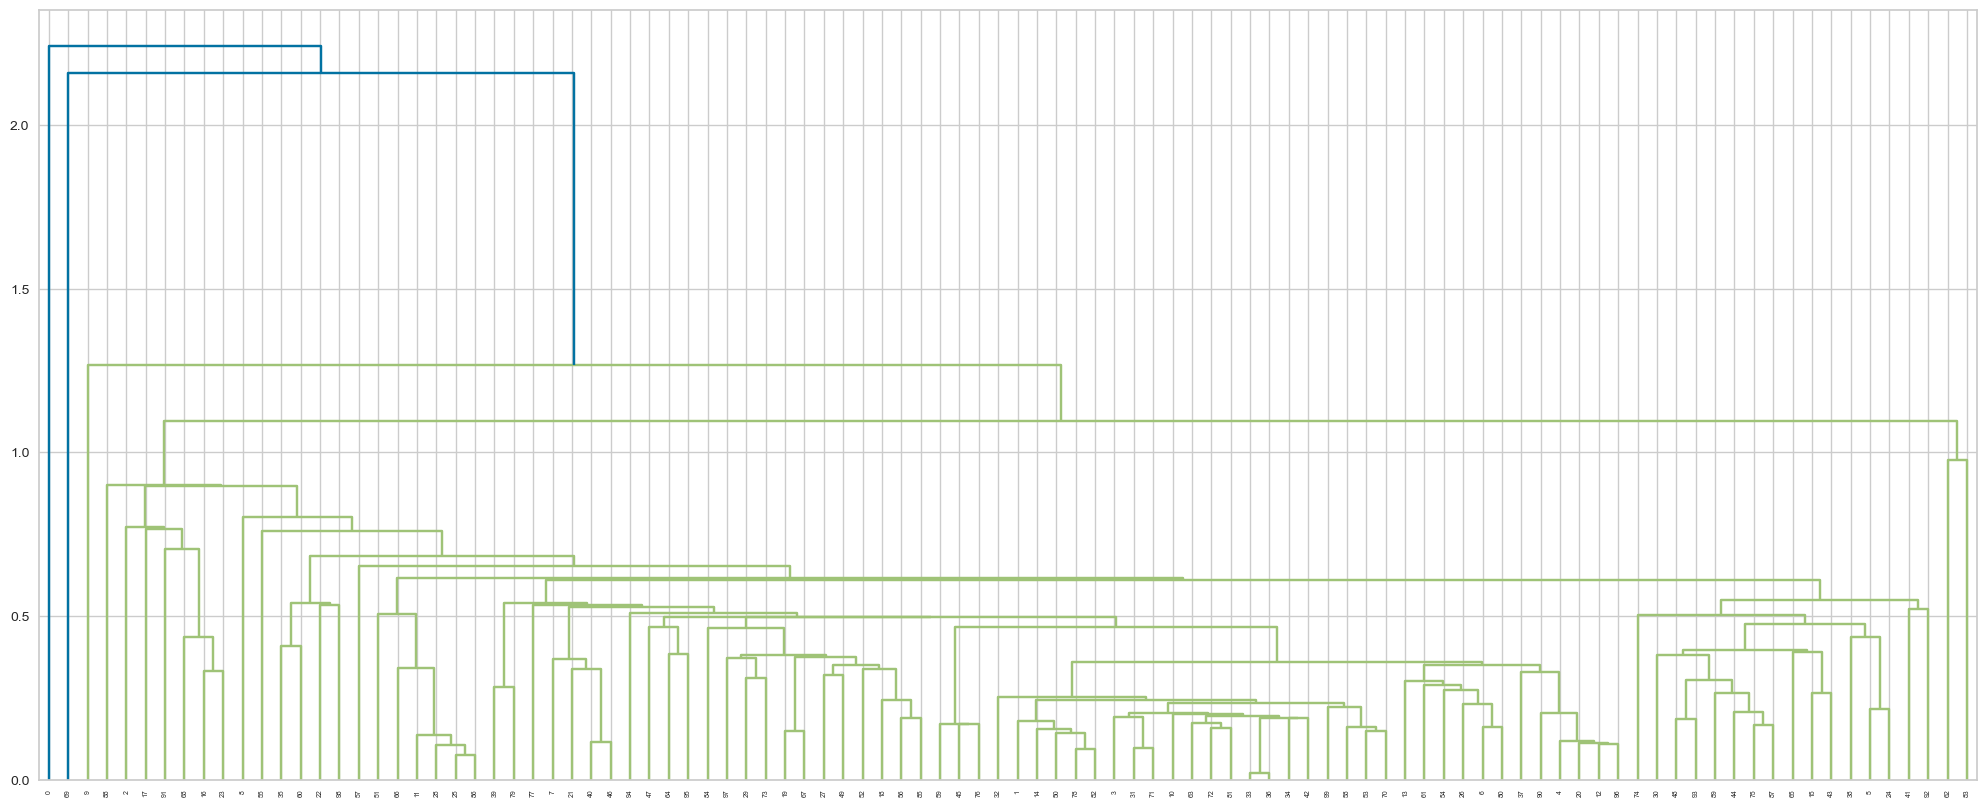

In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage

RFM_Sample = RFM_norm1.sample(100,random_state=10)

merging = linkage(RFM_Sample, method='single',metric='euclidean')

plt.figure(figsize=(25,10))
dendrogram(merging)
plt.show()

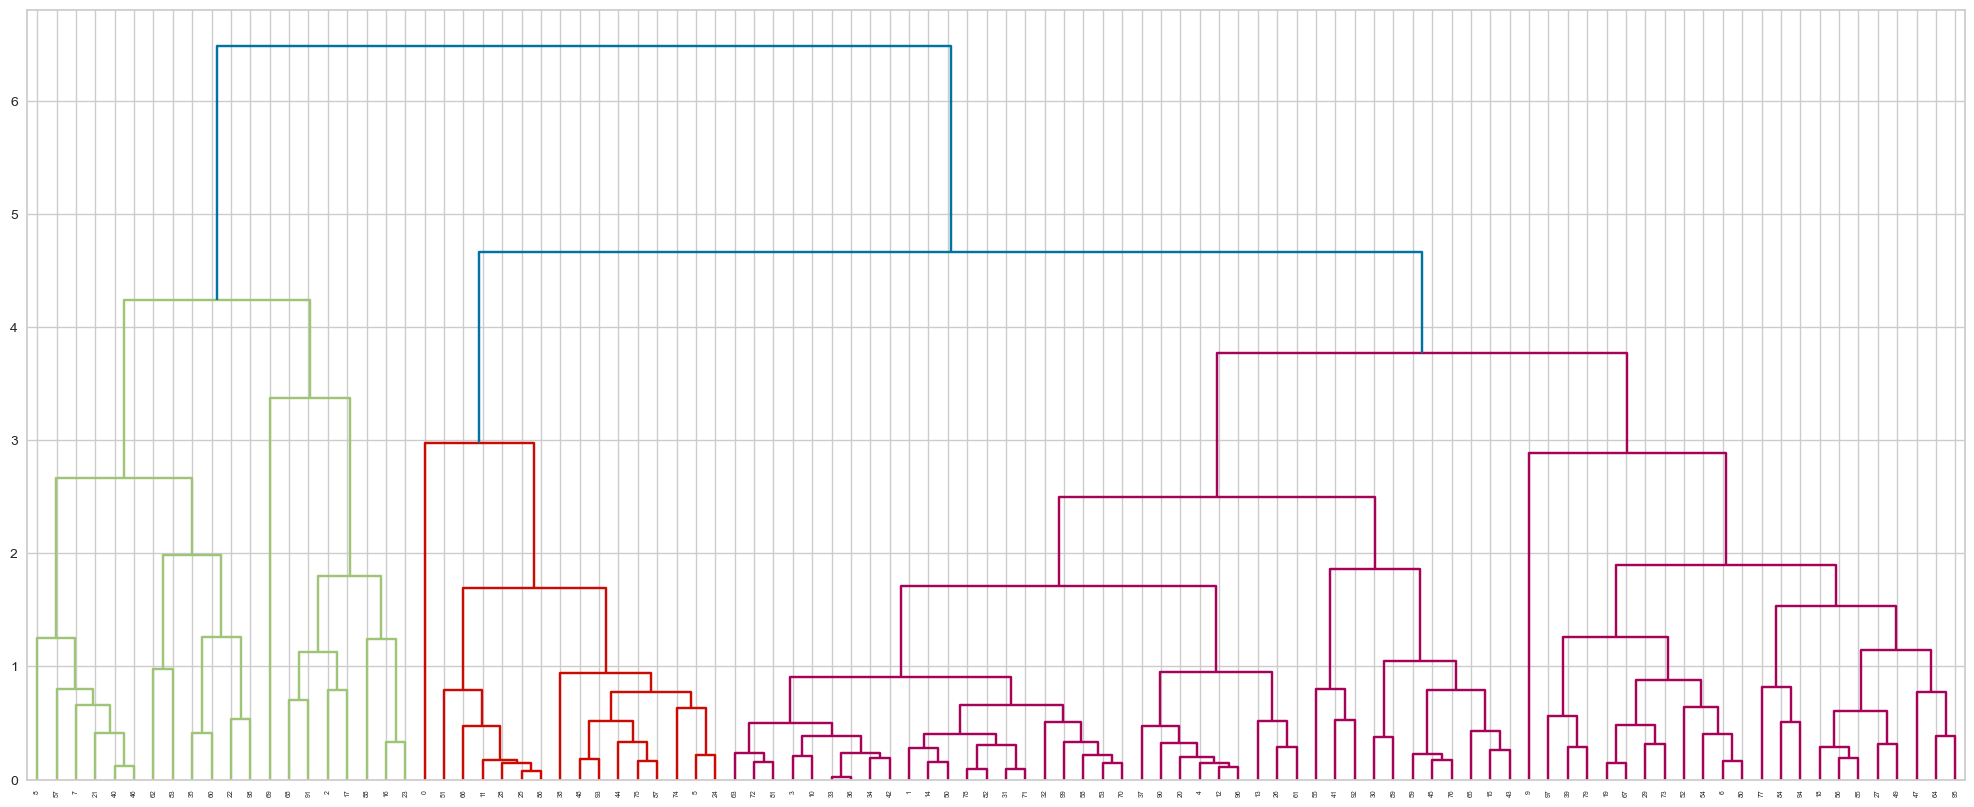

In [122]:
merging = linkage(RFM_Sample, method='complete',metric='euclidean')

plt.figure(figsize=(25,10))
dendrogram(merging)
plt.show()

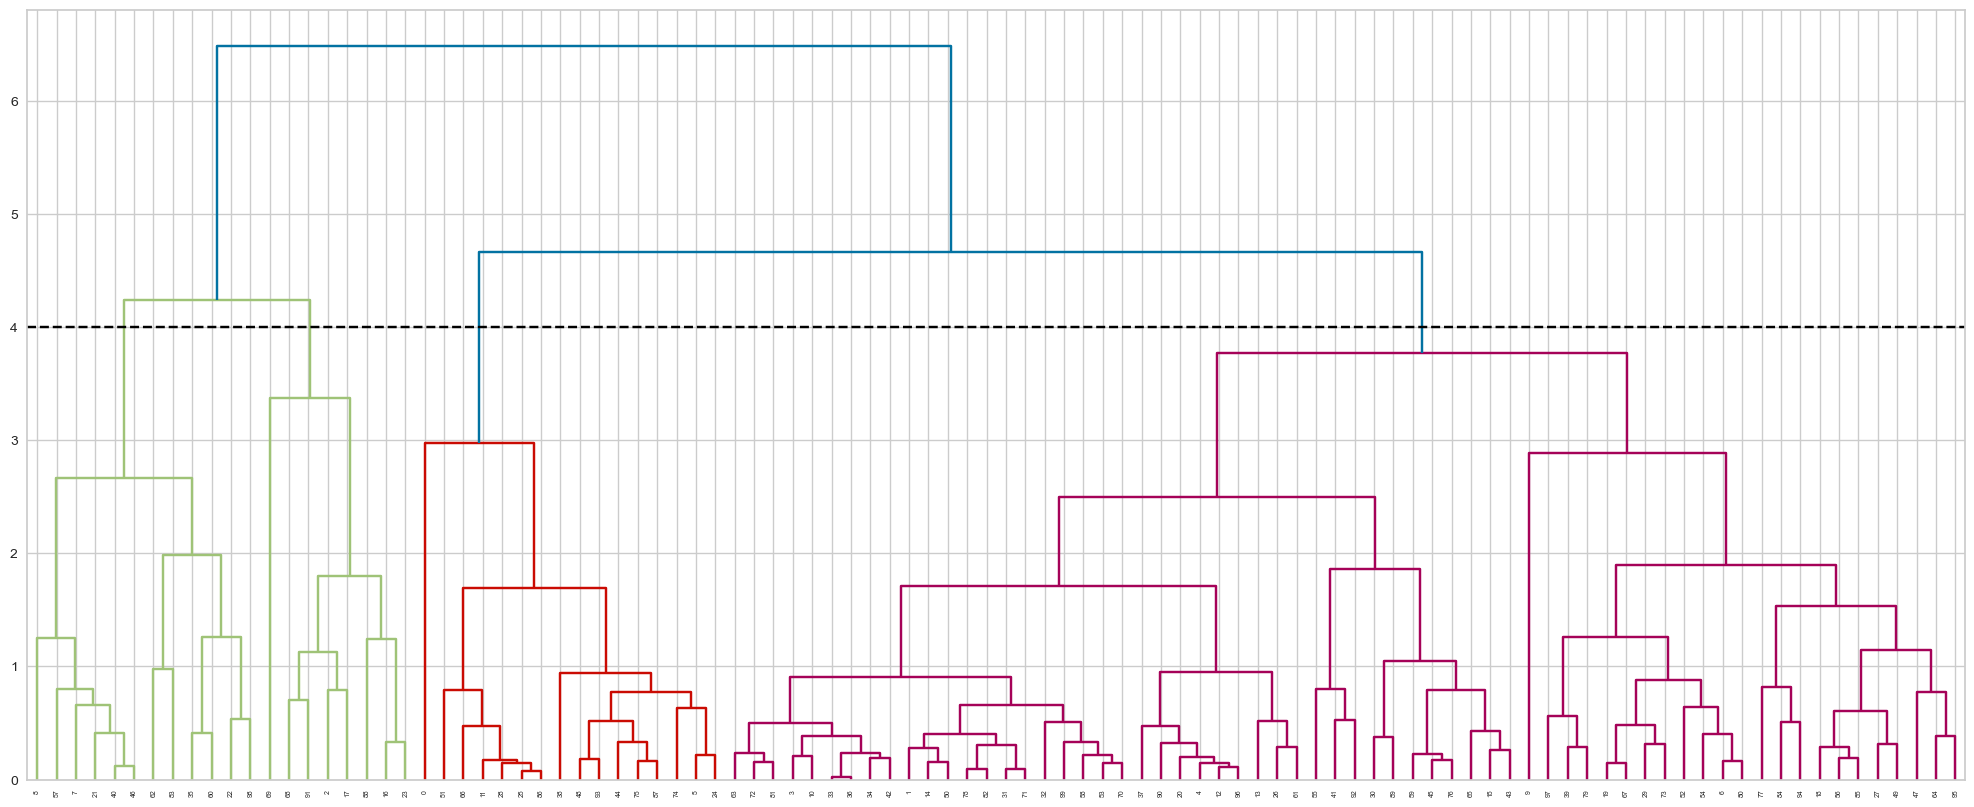

In [123]:
fig = plt.figure(figsize=(25,10))
dendrogram(merging)
plt.axhline(y=4, color='black',linestyle='--')
plt.show()

In [124]:
from sklearn.cluster import AgglomerativeClustering

k = 3

cluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')

clus = cluster.fit_predict(RFM_norm1)

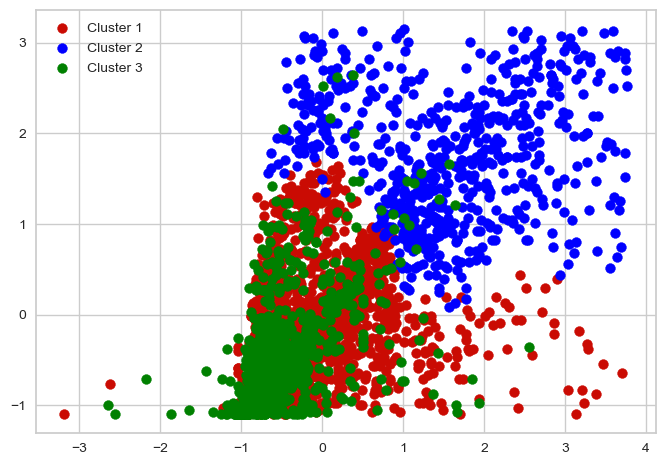

In [125]:
RFM_norm2 = np.array(RFM_norm1)


plt.scatter(RFM_norm2[clus==0,0], RFM_norm2[clus==0,1], s=50, marker='o',color='r',label='Cluster 1')
plt.scatter(RFM_norm2[clus==1,0], RFM_norm2[clus==1,1], s=50, marker='o',color='blue',label='Cluster 2')
plt.scatter(RFM_norm2[clus==2,0], RFM_norm2[clus==2,1], s=50, marker='o',color='green',label='Cluster 3')
plt.legend()

plt.show()

In [126]:
from sklearn import metrics
silhouette_score(RFM_norm2,clus)

0.4014568318292944

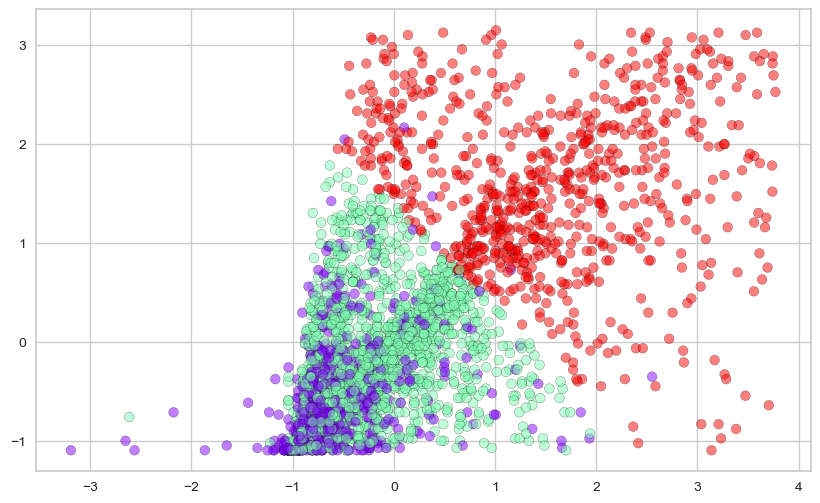

In [127]:
from sklearn.cluster import Birch

model = Birch(branching_factor=30,threshold=1.5,n_clusters=None)


model.fit(RFM_norm1)

pred = model.predict(RFM_norm1)

plt.figure(figsize=(10,6))
plt.scatter(RFM_norm1['Frequency'],RFM_norm1['Amount'],c=pred,cmap='rainbow',alpha=0.5,edgecolors='black')
plt.show()

In [128]:
silhouette_score(RFM_norm1,model.labels_)

0.4394534595347018

In [129]:
from sklearn.cluster import DBSCAN

epsilon = 1

min_saples = 13

db = DBSCAN(eps=epsilon,min_samples=min_saples).fit(RFM_norm1)

In [130]:
labels = db.labels_

no_clusters = len(np.unique(labels))

no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimate no. of noise points: {no_noise}')

Estimated no. of clusters: 2
Estimate no. of noise points: 12


In [131]:
sample_cores = np.zeros_like(labels,dtype=bool)

sample_cores[db.core_sample_indices_] = True

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

1

In [132]:
silhouette_score(RFM_norm1,labels)

0.43048292908608643

In [133]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

mbk = MiniBatchKMeans(n_clusters=3,random_state=1)

mbk.fit(RFM_norm1)

mbk_means_cluster_centers = np.sort(mbk.cluster_centers_,axis=0)

mbk_means_labels = pairwise_distances_argmin(RFM_norm1,mbk_means_cluster_centers)

print(mbk_means_labels)

print(silhouette_score(RFM_norm1,mbk_means_labels))

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


[0 1 1 ... 0 0 1]
0.14051342777954287


In [134]:
yhat = mbk.predict(RFM_norm2)
clusters = np.unique(yhat)

C:\Users\Roshan Salunke\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  warnings.warn(


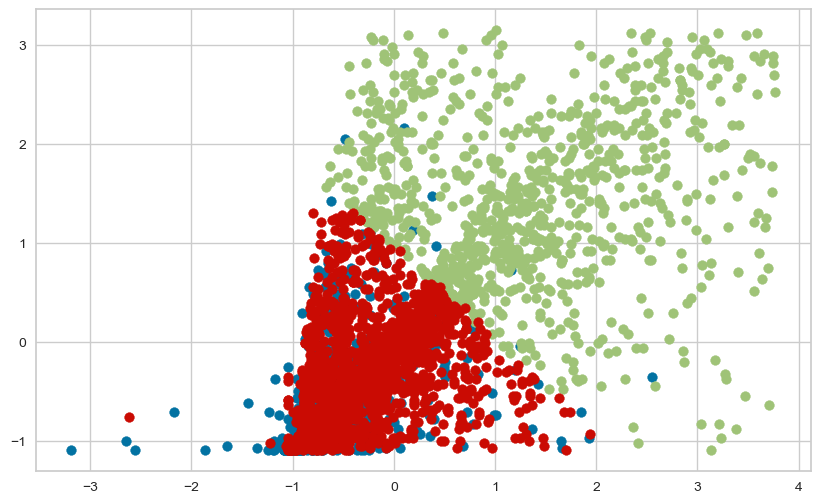

In [135]:
fig = plt.figure(figsize=(10,6))

for cluster in clusters:
    row_ix = np.where(yhat==cluster)
    plt.scatter(RFM_norm2[row_ix,0],RFM_norm2[row_ix,1])
    
plt.show()

In [136]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(RFM_norm2)
cluster_centers = ms.cluster_centers_
np.unique(ms.labels_)

array([0], dtype=int64)

In [137]:
from sklearn.cluster import OPTICS
ops = OPTICS().fit(RFM_norm2)
labels = ops.labels_

In [138]:
n_clusters = len(np.unique(labels))

no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'Estimated no. of clusters: {n_clusters}')
print(f'Estimated no. of noise points: {no_noise}')

Estimated no. of clusters: 136
Estimated no. of noise points: 2644


In [139]:
ops = OPTICS(eps=2, min_samples=30).fit(RFM_norm2)

labels = ops.labels_

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1 , axis=0)

print(f'Estimated no. of cluster: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')

Estimated no. of cluster: 2
Estimated no. of noise points: 3649


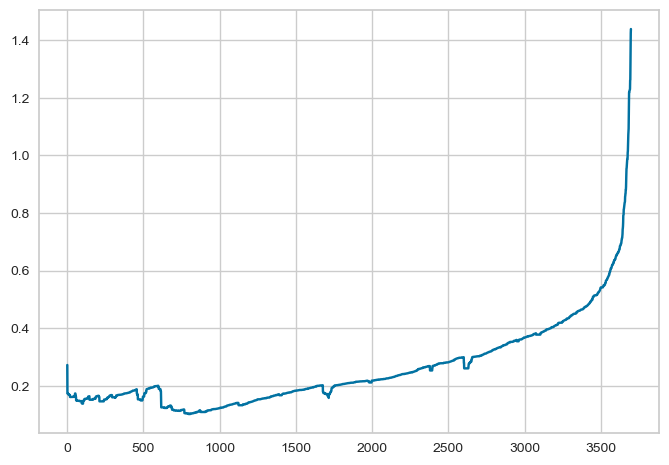

In [140]:
reachability = ops.reachability_[ops.ordering_]
plt.plot(reachability)

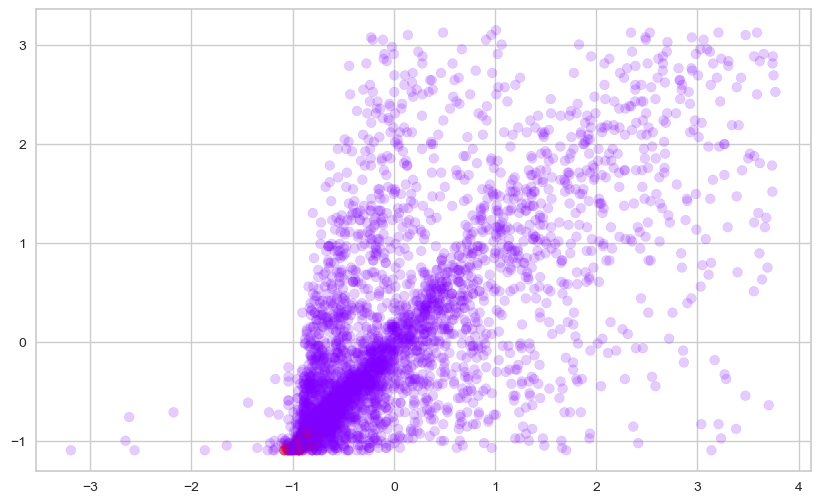

In [141]:
pred = ops.fit_predict(RFM_norm2)

fig = plt.figure(figsize=(10,6))
plt.scatter(RFM_norm1['Frequency'],RFM_norm1['Amount'],c=pred,cmap='rainbow',alpha=0.2)
plt.show()

In [142]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 3649, 0: 48}

In [143]:
metrics.silhouette_score(RFM_norm1, labels)

0.2536780059197283

In [144]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=4).fit(RFM_norm2)

np.unique(sc.labels_)

array([0, 1, 2, 3])

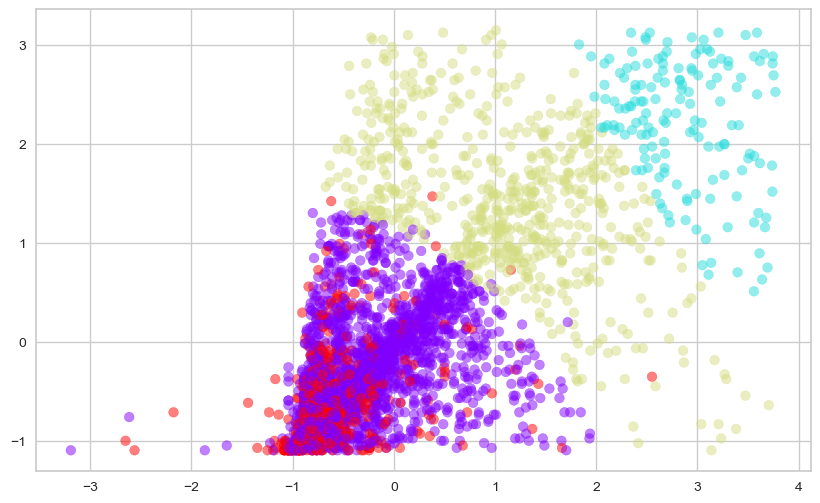

In [145]:
pred = sc.fit_predict(RFM_norm2)
fig = plt.figure(figsize=(10,6))

plt.scatter(RFM_norm1['Frequency'],RFM_norm1['Amount'],c=pred,cmap='rainbow',alpha=0.5)

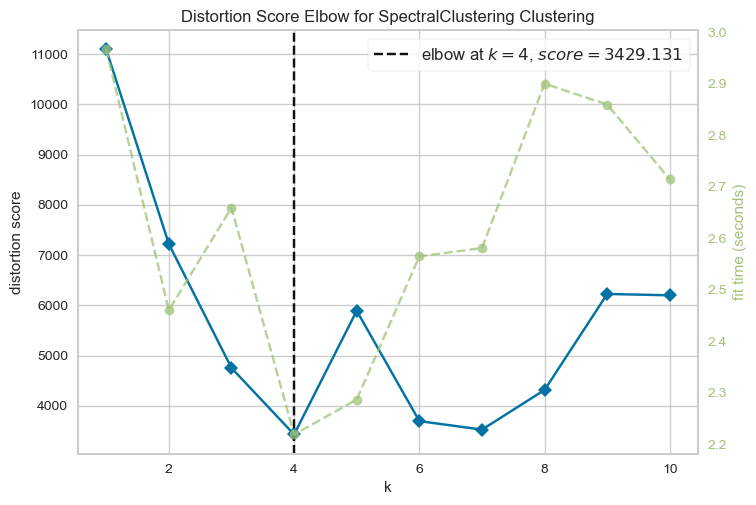

In [146]:
kelbow_visualizer(SpectralClustering(random_state=42),RFM_norm1,k=(1,11))
plt.show()

In [147]:
for n_clusters in range(2,11):
    sc = SpectralClustering(n_clusters=n_clusters)
    
    preds = sc.fit_predict(RFM_norm2)
    
    score = silhouette_score(RFM_norm2, preds, metric='euclidean')
    print(f'For n_clusters = {n_clusters}, score is {score}')

For n_clusters = 2, score is 0.4707386039783242
For n_clusters = 3, score is 0.3864076166422244
For n_clusters = 4, score is 0.4024904755023276
For n_clusters = 5, score is 0.37368814123762606
For n_clusters = 6, score is 0.36526287683016506
For n_clusters = 7, score is 0.36574185239582324
For n_clusters = 8, score is 0.2945957501580026
For n_clusters = 9, score is 0.333021870542784
For n_clusters = 10, score is 0.21257176187020344


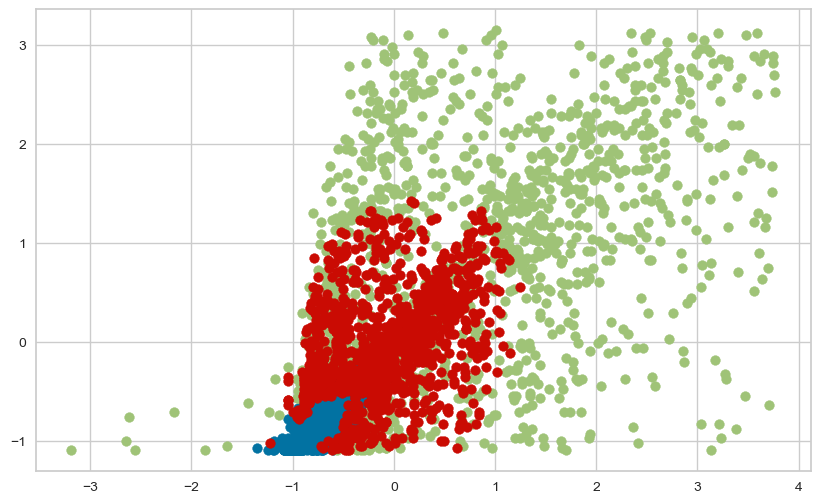

In [148]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(random_state=0,n_components=3).fit(RFM_norm2)

yhat = gm.predict(RFM_norm2)

clusters = np.unique(yhat)

fig = plt.figure(figsize=(10,6))
for cluster in clusters:
    row_ix = np.where(yhat==cluster)
    plt.scatter(RFM_norm2[row_ix,0],RFM_norm2[row_ix,1])
plt.show()

In [149]:
silhouette_score(RFM_norm2,yhat)

0.1776962218871887